### Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

challenging_complete = pd.read_excel('Challenging_complete.xlsx')

In [2]:
challenging_complete.head()

,Participant_code,Age,Sex,Language,Group,Session,Hand,Trial_Type,Accuracy,Response_Time
0,anhu1972,53,female,turkish,monolingual,duration,right,d_c_T4.wav,1,2579
1,anhu1972,53,female,turkish,monolingual,duration,right,d_ic_T5.wav,0,1257
2,anhu1972,53,female,turkish,monolingual,duration,right,d_ic_T4.wav,0,924
3,anhu1972,53,female,turkish,monolingual,duration,right,f_ic_T5.wav,0,984
4,anhu1972,53,female,turkish,monolingual,duration,right,d_ic_T1.wav,0,310


In [3]:
aggregated_challenging_data = challenging_complete.groupby(['Participant_code', 'Session', 'Group', 'Age'])['Accuracy'].mean().reset_index()

print(aggregated_challenging_data.head())

  Participant_code   Session        Group  Age  Accuracy
0           ARIL16  duration    bilingual   19     0.475
1           ARIL16      flat    bilingual   19     0.300
2           ARIL16     pitch    bilingual   19     0.400
3           AYER10  duration  monolingual   19     0.500
4           AYER10      flat  monolingual   19     0.400


In [4]:
def classify_audio_type(trial_type):
    if isinstance(trial_type, str):
        if 'c_' in trial_type and not 'ic_' in trial_type:  # Correct trials
            return 'correct'
        elif 'ic_' in trial_type:  # Incorrect trials
            return 'incorrect'
    return 'unknown'

# Re-apply classification logic
challenging_complete['Audio_Type'] = challenging_complete['Trial_Type'].apply(classify_audio_type)

# Verify the distribution of Audio_Type again
audio_type_counts = challenging_complete['Audio_Type'].value_counts()
print(audio_type_counts)

# Assuming you now have 'correct' and 'incorrect' classifications properly identified, 
# proceed to recalculate the accuracy per session for each participant
accuracy_per_audio = challenging_complete[challenging_complete['Audio_Type'] != 'unknown'].groupby(
    ['Participant_code','Age', 'Group','Session', 'Audio_Type'])['Accuracy'].mean().reset_index()

accuracy_per_audio.head()

Audio_Type
correct      1922
incorrect    1918
Name: count, dtype: int64


,Participant_code,Age,Group,Session,Audio_Type,Accuracy
0,ARIL16,19,bilingual,duration,correct,0.55
1,ARIL16,19,bilingual,duration,incorrect,0.40
2,ARIL16,19,bilingual,flat,correct,0.60
3,ARIL16,19,bilingual,flat,incorrect,0.00
4,ARIL16,19,bilingual,pitch,correct,0.50


In [5]:
audio_mono = accuracy_per_audio.query("Group != 'bilingual'")

audio_bi = accuracy_per_audio.query("Group != 'monolingual'")

In [6]:
aggregated_challenging_data_no_flat = aggregated_challenging_data.query("Session != 'flat'")

aggregated_challenging_data_only_flat = aggregated_challenging_data.query("Session == 'flat'")

print(aggregated_challenging_data_no_flat.head())
print(aggregated_challenging_data_only_flat.head())

  Participant_code   Session        Group  Age  Accuracy
0           ARIL16  duration    bilingual   19     0.475
2           ARIL16     pitch    bilingual   19     0.400
3           AYER10  duration  monolingual   19     0.500
5           AYER10     pitch  monolingual   19     0.500
6           AYHA09  duration    bilingual   50     0.500
   Participant_code Session        Group  Age  Accuracy
1            ARIL16    flat    bilingual   19       0.3
4            AYER10    flat  monolingual   19       0.4
7            AYHA09    flat    bilingual   50       0.9
10             AYME    flat  monolingual   42       0.4
13           AYME27    flat  monolingual   42       0.5


In [7]:
aggregated_challenging_data_no_session = aggregated_challenging_data_no_flat.groupby(['Participant_code', 'Group', 'Age'])['Accuracy'].mean().reset_index()

print(aggregated_challenging_data_no_session.head())

  Participant_code        Group  Age  Accuracy
0           ARIL16    bilingual   19    0.4375
1           AYER10  monolingual   19    0.5000
2           AYHA09    bilingual   50    0.6750
3             AYME  monolingual   42    0.3750
4           AYME27  monolingual   42    0.5000


In [11]:
# Filter for participants between the ages of 18 and 35
age_filtered_data = aggregated_challenging_data[(aggregated_challenging_data['Age'] >= 18) & (aggregated_challenging_data['Age'] <= 35)]
age_filtered_data_older = aggregated_challenging_data[(aggregated_challenging_data['Age'] >= 36)]


# Display the first few rows of the filtered data
print(age_filtered_data.head())
print(age_filtered_data_older.head())

  Participant_code   Session        Group  Age  Accuracy
0           ARIL16  duration    bilingual   19     0.475
1           ARIL16      flat    bilingual   19     0.300
2           ARIL16     pitch    bilingual   19     0.400
3           AYER10  duration  monolingual   19     0.500
4           AYER10      flat  monolingual   19     0.400
   Participant_code   Session        Group  Age  Accuracy
6            AYHA09  duration    bilingual   50      0.50
7            AYHA09      flat    bilingual   50      0.90
8            AYHA09     pitch    bilingual   50      0.85
9              AYME  duration  monolingual   42      0.50
10             AYME      flat  monolingual   42      0.40


### Participant Statistics

In [12]:
participant_data = challenging_complete[['Participant_code', 'Age', 'Sex', 'Group']].drop_duplicates()

participant_data.head()

,Participant_code,Age,Sex,Group
0,anhu1972,53,female,monolingual
50,ARIL16,19,female,bilingual
140,AŞKA09,23,female,bilingual
240,AYER10,19,female,monolingual
290,AYHA09,50,female,bilingual


In [13]:
group_counts = participant_data['Group'].value_counts()

# Display the counts
print(group_counts)

Group
monolingual    40
bilingual      40
Name: count, dtype: int64


In [14]:
# Basic info about the dataset
print(participant_data.info())

# Summary statistics for numerical variables
print(participant_data.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 0 to 3790
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Participant_code  80 non-null     object
 1   Age               80 non-null     int64 
 2   Sex               80 non-null     object
 3   Group             80 non-null     object
dtypes: int64(1), object(3)
memory usage: 3.1+ KB
None
             Age
count  80.000000
mean   36.412500
std    14.540814
min    18.000000
25%    21.750000
50%    36.500000
75%    52.250000
max    62.000000


In [15]:
group_stats = participant_data.groupby('Group').agg(
    Count=('Participant_code', 'size'),
    Mean_Age=('Age', 'mean'),
    SD_Age=('Age', 'std'),
    Count_Female=('Sex', lambda x: (x == 'female').sum()),
    Count_Male=('Sex', lambda x: (x == 'male').sum())
).reset_index()

# Print group-wise statistics
print(group_stats)



         Group  Count  Mean_Age     SD_Age  Count_Female  Count_Male
0    bilingual     40    35.425  16.003025            21          18
1  monolingual     40    37.400  13.045876            25          15


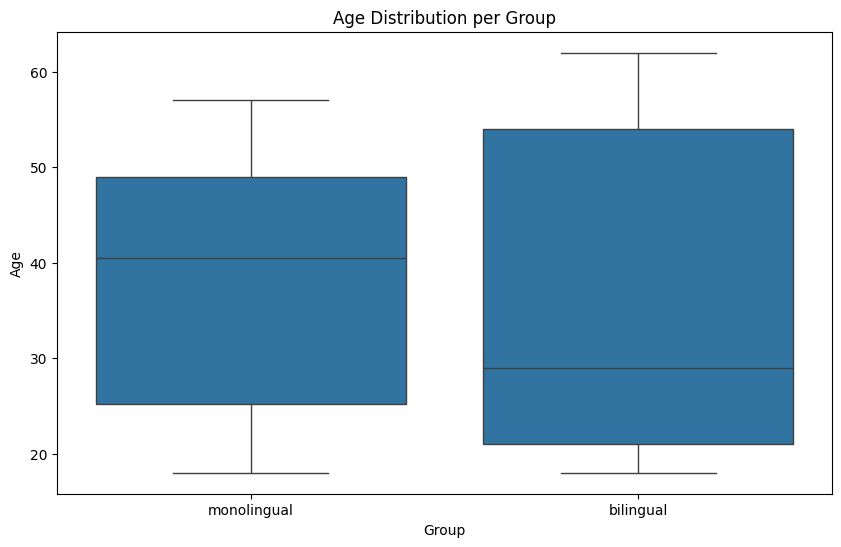

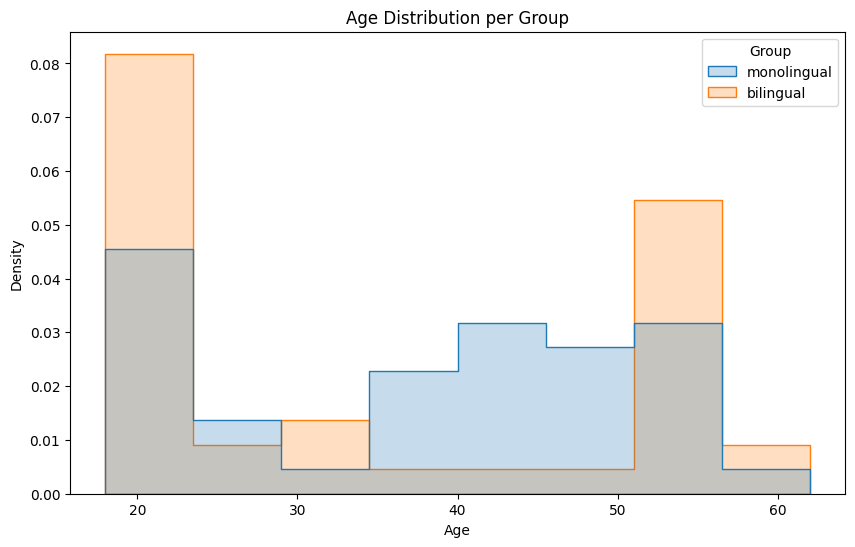

In [17]:
# Create a box plot for age distribution per group
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='Age', data=participant_data)
plt.title('Age Distribution per Group')
plt.xlabel('Group')
plt.ylabel('Age')
plt.show()

# Create a histogram for age distribution per group
plt.figure(figsize=(10, 6))
sns.histplot(data=participant_data, x='Age', hue='Group', element='step', stat='density', common_norm=False)
plt.title('Age Distribution per Group')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

### Exploratory Data Analysis

Average Accuracy and Response Time by Group (Monolingual vs. Bilingual)

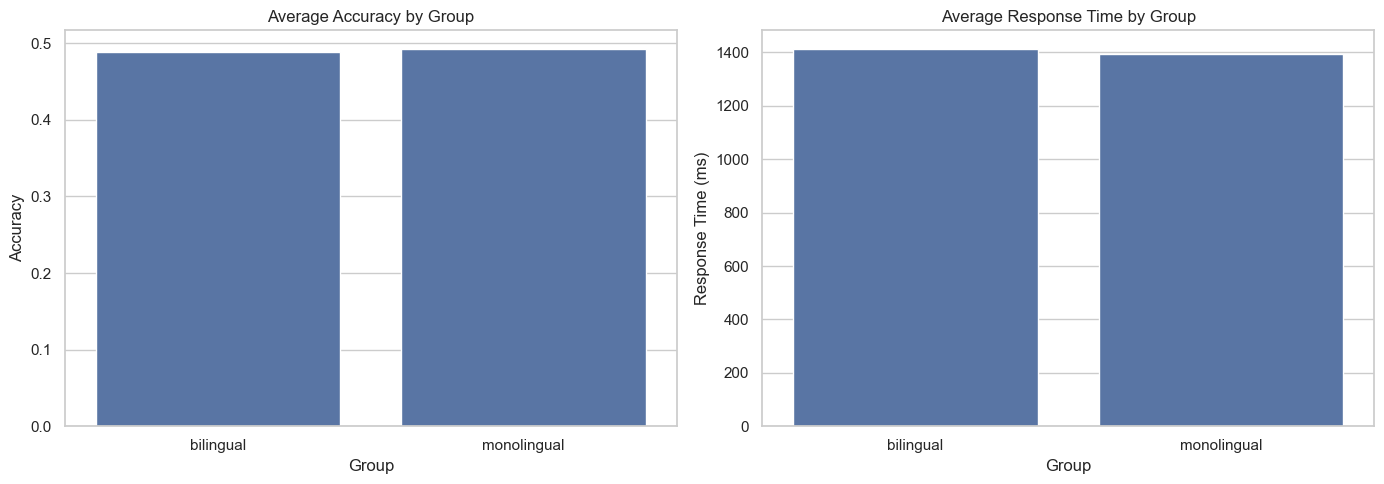

In [19]:
group_performance = challenging_complete.groupby('Group')[['Accuracy', 'Response_Time']].mean().reset_index()

# Setting the style
sns.set(style="whitegrid")

# Creating a figure with two subplots (axes) for accuracy and response time
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(x='Group', y='Accuracy', data=group_performance, ax=axes[0])
axes[0].set_title('Average Accuracy by Group')
axes[0].set_xlabel('Group')
axes[0].set_ylabel('Accuracy')

# Plotting average response time by group
sns.barplot(x='Group', y='Response_Time', data=group_performance, ax=axes[1])
axes[1].set_title('Average Response Time by Group')
axes[1].set_xlabel('Group')
axes[1].set_ylabel('Response Time (ms)')

# Display the plots
plt.tight_layout()
plt.show()

Performance by Session Type

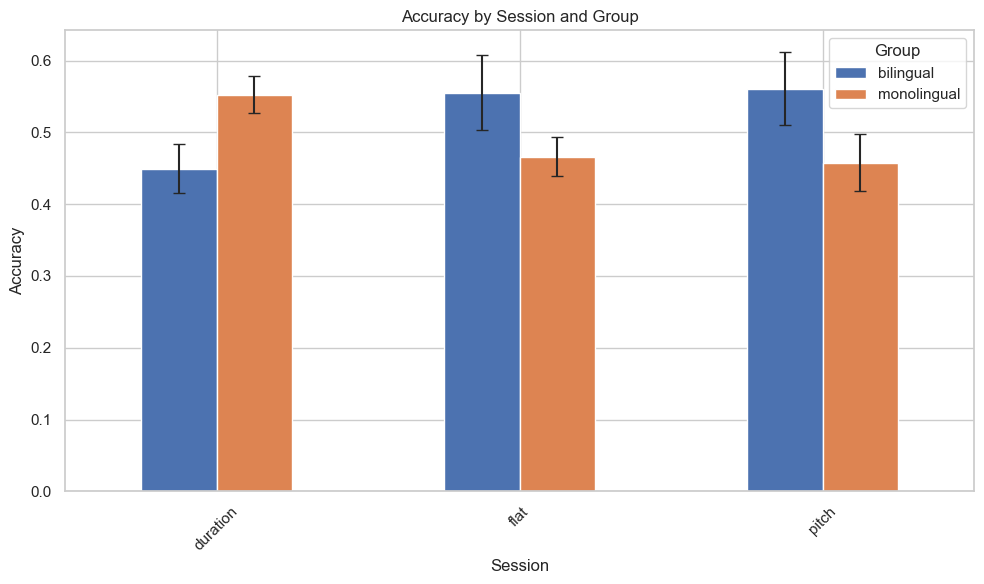

In [20]:
# Calculate group means and standard errors for each session and group
group_means = aggregated_challenging_data.groupby(['Session', 'Group'])['Accuracy'].mean().unstack()
group_se = aggregated_challenging_data.groupby(['Session', 'Group'])['Accuracy'].sem().unstack()

# Plot the accuracies with error bars for each session and group
fig, ax = plt.subplots(figsize=(10, 6))
group_means.plot(kind='bar', yerr=group_se, capsize=4, ax=ax)

ax.set_title('Accuracy by Session and Group')
ax.set_xlabel('Session')
ax.set_ylabel('Accuracy')
plt.xticks(rotation=45)
plt.legend(title='Group')
plt.tight_layout()
plt.show()

### Statistical Anlaysis

In [21]:
model_flat = ols('Accuracy ~ C(Group) + Age', data=aggregated_challenging_data_only_flat).fit()
anova_flat = sm.stats.anova_lm(model_flat, typ=2)
print(anova_flat)

            sum_sq    df         F    PR(>F)
C(Group)  0.169742   1.0  2.522102  0.116525
Age       0.069155   1.0  1.027538  0.314041
Residual  4.980345  74.0       NaN       NaN


In this analysis, neither the group effect (bilingual vs. monolingual) nor age show statistically significant effects on the dependent variable. The p-values are still above the usual threshold for significance (0.05), meaning the null hypothesis (no effect) cannot be rejected for these factors based on this data. However, the p-value for group is somewhat closer to the threshold, indicating a potential for significance with a larger sample size or additional data.

In [22]:
model = ols('Accuracy ~ C(Group) + Age', data=aggregated_challenging_data_no_session).fit()
anova = sm.stats.anova_lm(model, typ=2)
print(anova)

            sum_sq    df         F    PR(>F)
C(Group)  0.018601   1.0  1.076629  0.303240
Age       0.161957   1.0  9.374040  0.003182
Residual  1.140294  66.0       NaN       NaN


The results indicate that while the group variable does not have a significant effect on accuracy, age does significantly influence accuracy in the dataset under analysis. Age, treated as a continuous predictor, is significantly associated with variations in accuracy, suggesting it's an important factor to consider in further analysis or experimental design.

In [16]:
model = ols('Accuracy ~ C(Group)', data=age_filtered_data).fit()
anova_results = sm.stats.anova_lm(model, typ=2)
print(anova_results)

model = ols('Accuracy ~ C(Group)', data=age_filtered_data_older).fit()
anova_results = sm.stats.anova_lm(model, typ=2)
print(anova_results)

            sum_sq     df         F    PR(>F)
C(Group)  0.023085    1.0  0.590663  0.443825
Residual  4.259990  109.0       NaN       NaN
            sum_sq    df         F    PR(>F)
C(Group)  0.597592   1.0  8.846977  0.003688
Residual  6.687213  99.0       NaN       NaN


Age Group 18-35: There is no significant difference in Accuracy between the monolingual and bilingual groups.

Age Group 36 and Older: There is a significant difference in Accuracy between the monolingual and bilingual groups. The F-statistic is 8.8470, and the low p-value (0.003688) indicates a strong likelihood that the difference in Accuracy between the groups is not due to random chance.

In [23]:
model = ols('Accuracy ~ C(Group) + Age + C(Audio_Type)', data=accuracy_per_audio).fit()
anova = sm.stats.anova_lm(model, typ=2)
print(anova)

                  sum_sq     df           F        PR(>F)
C(Group)        0.167454    1.0    1.918345  1.667924e-01
C(Audio_Type)  12.510409    1.0  143.319014  1.571621e-28
Age             0.534747    1.0    6.126053  1.372375e-02
Residual       35.789164  410.0         NaN           NaN


The analysis indicates that while the group differences (bilinguals vs. monolinguals) do not significantly influence accuracy, both the type of audio and age have significant effects. Specifically, the type of audio played has a very strong effect on accuracy, potentially due to the varying cognitive demands or familiarity associated with different audio types. Age also significantly affects accuracy, suggesting that factors such as cognitive maturity or experience that vary with age are relevant in how individuals perform in tasks involving audio processing. This insight can be useful in tailoring or modifying audio-related tasks or experiments based on age and audio type, while less differentiation might be needed between bilingual and monolingual groups concerning accuracy in this specific context.

In [24]:
df_mono = aggregated_challenging_data_no_flat[aggregated_challenging_data_no_flat['Group'] == 'monolingual']

model = ols('Accuracy ~ C(Session) + Age', data=df_mono).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

              sum_sq    df         F    PR(>F)
C(Session)  0.170526   1.0  4.030600  0.048384
Age         0.003890   1.0  0.091951  0.762574
Residual    3.088478  73.0       NaN       NaN


For monolinguals, session changes significantly impact accuracy, albeit with a marginal significance level, suggesting that contextual factors linked to different sessions could affect performance outcomes. Age, however, does not show a significant effect, indicating that within this subgroup, age variations do not correlate significantly with accuracy changes.

In [25]:
df_bi = aggregated_challenging_data_no_flat[aggregated_challenging_data_no_flat['Group'] == 'bilingual']

model = ols('Accuracy ~ C(Session) + Age', data=df_bi).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

              sum_sq    df          F    PR(>F)
C(Session)  0.211698   1.0   4.668738  0.035009
Age         0.559254   1.0  12.333628  0.000887
Residual    2.539255  56.0        NaN       NaN


In the context of bilingual individuals, both session and age significantly influence accuracy. The session effect, while moderate, is statistically significant, indicating that different session contexts or conditions can impact performance outcomes among bilinguals. More notably, age shows a strong and highly significant impact on accuracy, suggesting that age-related factors (possibly including experience, cognitive development, or other age-related changes) play a crucial role in performance among this group.

These findings contrast with the earlier analysis for monolinguals, where age did not show a significant effect, highlighting possible differences in how age influences accuracy across linguistic groups. This could suggest that bilinguals' cognitive and linguistic experiences, potentially more varied across age, impact their performance differently than monolinguals.

In [26]:
# For monolinguals
model_mono = ols('Accuracy ~ C(Session) + C(Audio_Type)', data=audio_mono).fit()
anova_mono = sm.stats.anova_lm(model_mono, typ=2)
print("Monolingual ANOVA Results:")
print(anova_mono)
print('   ')

# For bilinguals
model_bi = ols('Accuracy ~ C(Session) + C(Audio_Type)', data=audio_bi).fit()
anova_bi = sm.stats.anova_lm(model_bi, typ=2)
print("Bilingual ANOVA Results:")
print(anova_bi)

Monolingual ANOVA Results:
                  sum_sq     df           F        PR(>F)
C(Session)      0.412660    2.0    2.428203  9.051364e-02
C(Audio_Type)   8.859037    1.0  104.257861  2.415637e-20
Residual       19.033810  224.0         NaN           NaN
   
Bilingual ANOVA Results:
                  sum_sq     df          F        PR(>F)
C(Session)      0.405318    2.0   2.277208  1.054855e-01
C(Audio_Type)   3.926489    1.0  44.120558  3.455102e-10
Residual       16.197006  182.0        NaN           NaN


For monolinguals, while the effect of session type shows a potential trend, it's not statistically significant. The audio type, however, has a very significant impact on accuracy, strongly influencing performance.

Similarly to monolinguals, for bilinguals, session type does not significantly impact accuracy. However, audio type plays a crucial and significant role in determining accuracy, suggesting that different audio stimuli lead to markedly different performance outcomes in both language groups.

For both monolinguals and bilinguals, audio type is a critical factor influencing accuracy significantly, while session type, despite showing potential trends, does not conclusively impact performance. This consistency across language groups highlights the dominant role of audio content and its presentation in accuracy-related tasks, transcending language group differences.

In [27]:
df_mono = challenging_complete[challenging_complete['Group'] == 'monolingual']

# For monolinguals - Correct
model_mono_correct = ols('Accuracy ~ C(Session) + Age', data=df_mono[df_mono['Audio_Type'] == 'correct']).fit()
anova_mono_correct = sm.stats.anova_lm(model_mono_correct, typ=2)
print("Monolingual Correct ANOVA Results:")
print(anova_mono_correct)

print('   ')
# For monolinguals - Incorrect
model_mono_incorrect = ols('Accuracy ~ C(Session) + Age', data=df_mono[df_mono['Audio_Type'] == 'incorrect']).fit()
anova_mono_incorrect = sm.stats.anova_lm(model_mono_incorrect, typ=2)
print("Monolingual Incorrect ANOVA Results:")
print(anova_mono_incorrect)

Monolingual Correct ANOVA Results:
                sum_sq     df         F    PR(>F)
C(Session)    0.705078    2.0  1.634163  0.195748
Age           0.006700    1.0  0.031059  0.860153
Residual    177.546245  823.0       NaN       NaN
   
Monolingual Incorrect ANOVA Results:
                sum_sq     df         F    PR(>F)
C(Session)    0.819974    2.0  1.959172  0.141634
Age           0.010340    1.0  0.049413  0.824143
Residual    171.806998  821.0       NaN       NaN


For monolinguals, neither session type nor age significantly impacts accuracy in both correct and incorrect audio scenarios.

In [28]:
df_bi = challenging_complete[challenging_complete['Group'] == 'bilingual']

# For bilinguals - Correct
model_bi_correct = ols('Accuracy ~ C(Session) + C(Language) + Age', data=df_bi[df_bi['Audio_Type'] == 'correct']).fit()
anova_bi_correct = sm.stats.anova_lm(model_bi_correct, typ=2)
print("Bilingual Correct ANOVA Results:")
print(anova_bi_correct)
print('   ')

# For bilinguals - Incorrect
model_bi_incorrect = ols('Accuracy ~ C(Session) + C(Language) + Age', data=df_bi[df_bi['Audio_Type'] == 'incorrect']).fit()
anova_bi_incorrect = sm.stats.anova_lm(model_bi_incorrect, typ=2)
print("Bilingual Incorrect ANOVA Results:")
print(anova_bi_incorrect)


Bilingual Correct ANOVA Results:
                 sum_sq      df          F    PR(>F)
C(Session)     0.039154     2.0   0.084713  0.918782
C(Language)    0.136246     1.0   0.589566  0.442753
Age            4.468155     1.0  19.334602  0.000012
Residual     251.894945  1090.0        NaN       NaN
   
Bilingual Incorrect ANOVA Results:
                 sum_sq      df          F        PR(>F)
C(Session)     1.620030     2.0   3.720221  2.453737e-02
C(Language)    0.305421     1.0   1.402731  2.365255e-01
Age           10.482139     1.0  48.142157  6.794273e-12
Residual     236.893576  1088.0        NaN           NaN


For bilinguals, the effect of age is pronounced and significant in both correct and incorrect scenarios, suggesting age plays a crucial role in accuracy. Session type significantly influences accuracy only in incorrect scenarios, indicating situational factors may play a role in how bilinguals process audio errors. Language, however, does not significantly affect accuracy in either scenario.

### Some Nice Graphs

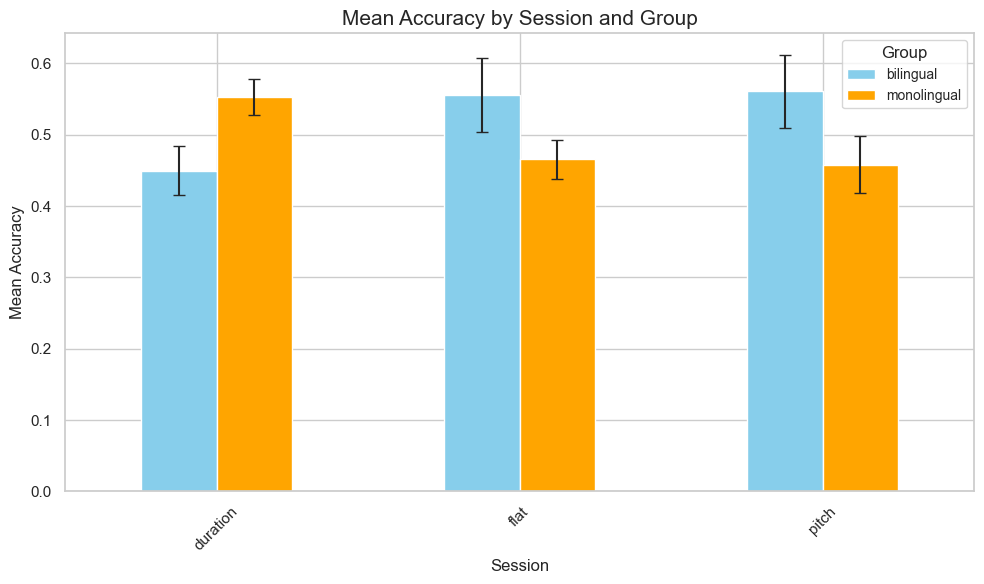

In [29]:
# Calculate group means and standard errors for each session and group
group_means = aggregated_challenging_data.groupby(['Session', 'Group'])['Accuracy'].mean().unstack()
group_se = aggregated_challenging_data.groupby(['Session', 'Group'])['Accuracy'].sem().unstack()

# Plot the accuracies with error bars for each session and group
fig, ax = plt.subplots(figsize=(10, 6))

# Use 'bar' kind for mean accuracies with error bars representing the standard errors
group_means.plot(kind='bar', yerr=group_se, capsize=4, ax=ax, color=['skyblue', 'orange'])  # Adjust colors as needed

# Set titles and labels
ax.set_title('Mean Accuracy by Session and Group', fontsize=15)  # Adjust title and fontsize as necessary
ax.set_xlabel('Session', fontsize=12)
ax.set_ylabel('Mean Accuracy', fontsize=12)

# Improve x-tick labels readability
plt.xticks(rotation=45)

# Add a legend to explain the groups
plt.legend(title='Group', fontsize=10)

# Ensure the layout fits the elements without overlap
plt.tight_layout()

# Show the plot
plt.show()


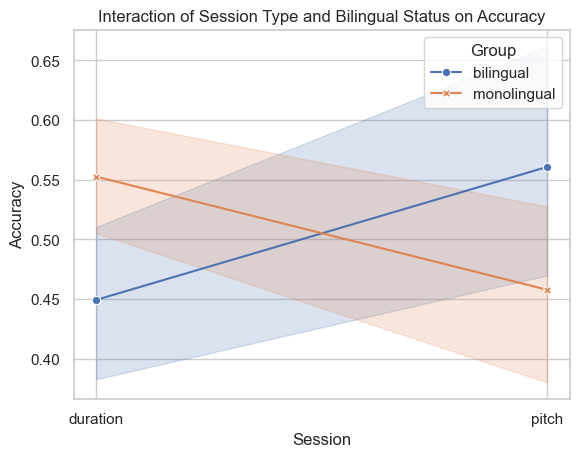

In [30]:
sns.lineplot(x='Session', y='Accuracy', hue='Group', style='Group', data=aggregated_challenging_data_no_flat, markers=True, dashes=False)
plt.title('Interaction of Session Type and Bilingual Status on Accuracy')
plt.show()

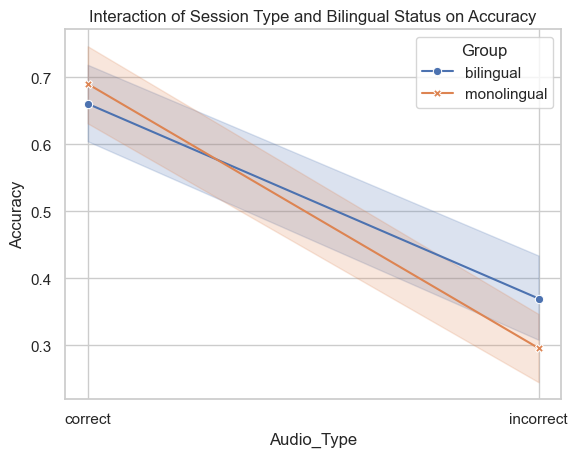

In [31]:
sns.lineplot(x='Audio_Type', y='Accuracy', hue='Group', style='Group', data=accuracy_per_audio, markers=True, dashes=False)
plt.title('Interaction of Session Type and Bilingual Status on Accuracy')
plt.show()